In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# CARGA DE DATOS

INFORMACION DEL DATASET

https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification

1. Agrupe las maquinas por tipo y por tipo de fallo
2. Listado de las maquinas, ordenandolas por la cantidad de rotaciones por minuto(rpm)
3. Halle la cantidad de maquinas con fallas que tienen una temperatura en proceso mayor a la indicada por el usuario
4. Halle la cantidad de maquinas que presentan algun tipo de fallo
5. Halle el promedio de la temperatura del aire en las maquinas que tienen fallas por disipacion de calor

De manera grafica prsente los siguientes reportes
1. Temperatura en proceso promedio, minima y maxima por cada tipo de maquina
2. Porcentaje mde maquinas por tipo
3. Porcentaje de maquinas por fallos 
4. Correlacion entre las caracteriasticas de las maquinas 


In [2]:
#  PRESENTACION DE LOS DATOS

df = pd.read_csv("predictive_maintenance.csv")
df

,UDI,Product_ID,Type,Air_temperature_[K],Process_temperature_[K],Rotational_speed_[rpm],Torque_[Nm],Tool_wear_[min],Target,Failure_Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [5]:
#1. AGRUPACION DE MAQUINAS POR TIPO Y TIPO DE FALLOS

df.groupby(['Type','Failure_Type']).nunique()

UDI  Product_ID  Air_temperature_[K]  \
Type Failure_Type                                                      
H    Heat Dissipation Failure     8           8                    7   
     No Failure                 979         979                   86   
     Overstrain Failure           1           1                    1   
     Power Failure                5           5                    5   
     Random Failures              4           4                    4   
     Tool Wear Failure            6           6                    6   
L    Heat Dissipation Failure    74          74                   22   
     No Failure                5757        5757                   93   
     Overstrain Failure          73          73                   44   
     Power Failure               59          59                   42   
     Random Failures             12          12                   11   
     Tool Wear Failure           25          25                   24   
M    Heat Dissipation Failure    30          30                   15   
     No Failure                2916        2916                   92   
     Overstrain Failure           4           4                    4   
     Power Failure               31          31                   30   
     Random Failures              2           2                    2   
     Tool Wear Failure           14          14                   12   

                               Process_temperature_[K]  \
Type Failure_Type                                        
H    Heat Dissipation Failure                        7   
     No Failure                                     74   
     Overstrain Failure                              1   
     Power Failure                                   5   
     Random Failures                                 4   
     Tool Wear Failure                               5   
L    Heat Dissipation Failure                       21   
     No Failure                                     82   
     Overstrain Failure                             38   
     Power Failure                                  36   
     Random Failures                                11   
     Tool Wear Failure                              20   
M    Heat Dissipation Failure                       18   
     No Failure                                     82   
     Overstrain Failure                              4   
     Power Failure                                  24   
     Random Failures                                 2   
     Tool Wear Failure                              13   

                               Rotational_speed_[rpm]  Torque_[Nm]  \
Type Failure_Type                                                    
H    Heat Dissipation Failure                       8            8   
     No Failure                                   456          341   
     Overstrain Failure                             1            1   
     Power Failure                                  5            5   
     Random Failures                                4            4   
     Tool Wear Failure                              6            6   
L    Heat Dissipation Failure                      48           65   
     No Failure                                   803          488   
     Overstrain Failure                            61           60   
     Power Failure                                 57           51   
     Random Failures                               12           12   
     Tool Wear Failure                             24           25   
M    Heat Dissipation Failure                      26           29   
     No Failure                                   676          456   
     Overstrain Failure                             4            3   
     Power Failure                                 31           29   
     Random Failures                                2            2   
     Tool Wear Failure                             14           14   

                             

In [6]:
#2. LISTADO DE MAQUINAS, ORDENADAS POR LA CANTIDAD DE ROTACIONES POR MINUTO RPM

 #ESTA ORGANIZADA DE MAYOR RPM A MENOR RPM

df[["Product_ID","Rotational_speed_[rpm]"]].sort_values("Rotational_speed_[rpm]",ascending =False)


,Product_ID,Rotational_speed_[rpm]
1784,L48964,2886
463,L47643,2874
50,L47230,2861
847,L48027,2833
4296,L51476,2825
...,...,...
7763,L54943,1200
3584,L50764,1192
6404,M21264,1183
8437,L55617,1181


In [12]:
#3. CANTIDAD DE MAQUINAS CON FALLAS QUE TIENEN UNA TEMPERATURA EN PROCESO MAYOR A LA INDICADA POR EL USUARIO

temperatura_indicada = float(input('Ingrese la temperatura en K >>'))
df[['Product_ID']][(df['Process_temperature_[K]']>temperatura_indicada)&(df['Failure_Type'] != 'No Failure')]

Ingrese la temperatura en K >>50.23


,Product_ID
50,L47230
69,L47249
77,L47257
160,L47340
161,L47341
...,...
9758,L56938
9764,L56944
9822,L57002
9830,L57010


In [31]:
#4. CANTIDAD DE MAQUINAS POR TIPO Y CONTEO DE MAQUINAS QUE PRESENTAN FALLOS

df[df['Failure_Type'] != 'No Failure'].groupby(['Type','Failure_Type'])['UDI'].count().sum(level=0)


C:\Users\user\AppData\Local\Temp/ipykernel_7272/79968682.py:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df[df['Failure_Type'] != 'No Failure'].groupby(['Type','Failure_Type'])['UDI'].count().sum(level=0)


Type
H     24
L    243
M     81
Name: UDI, dtype: int64

In [18]:
#5. SE HALLO EL PROMEDIO DE LA TEMPERATURA DEL AIRE EN LAS MAQUINAS QUE TIENEN FALLO POR DISIPACION DE CALOR

df[(df['Failure_Type'] == 'Heat Dissipation Failure')]['Air_temperature_[K]'].mean()



302.56785714285735

# REPORTES GRAFICOS  

In [68]:
#TEMPERATURA EN PROCESO PROMEDIO, MINNIMA Y MAXIMA POR CADA TIPO DE MAQUINA
df.groupby('Type')['Process_temperature_[K]'].agg([np.mean, np.min, np.max])

,mean,amin,amax
Type,,,
H,309.925723,305.9,313.5
L,310.012300,305.7,313.8
M,310.018785,305.7,313.8


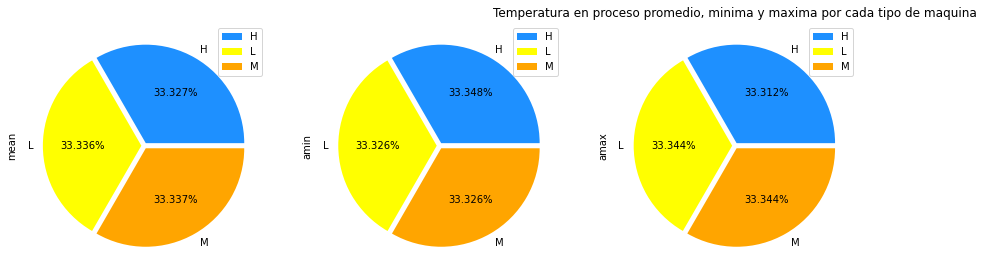

In [84]:
plt.rcParams["figure.figsize"] = (15, 15)
df.groupby('Type')['Process_temperature_[K]'].agg([np.mean, np.min, np.max]).plot.pie(explode = [0.03, 0.03, 0.03], colors = ['dodgerblue', 'yellow', 'orange'], autopct = '%1.3f%%',subplots= True, shadow = False)
plt.title('Temperatura en proceso promedio, minima y maxima por cada tipo de maquina')
plt.show()

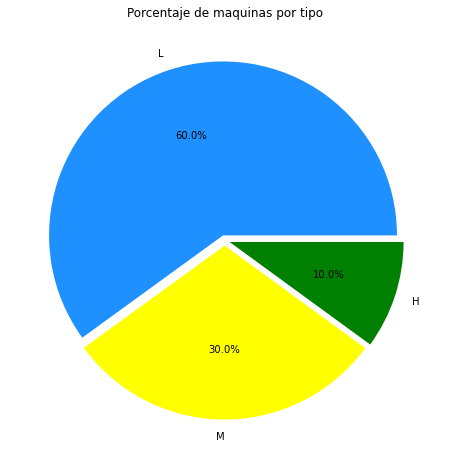

In [54]:
                 #PORCENTAJE DE MAQUINAS POR TIPO
plt.figure(figsize = (8,8))                              
df['Type'].value_counts().plot.pie(explode = [0.03, 0.03, 0.03], colors = ['dodgerblue', 'yellow', 'green'], autopct = '%1.1f%%', shadow = False)
plt.xlabel(''),plt.ylabel('')
plt.title('Porcentaje de maquinas por tipo')
plt.show()

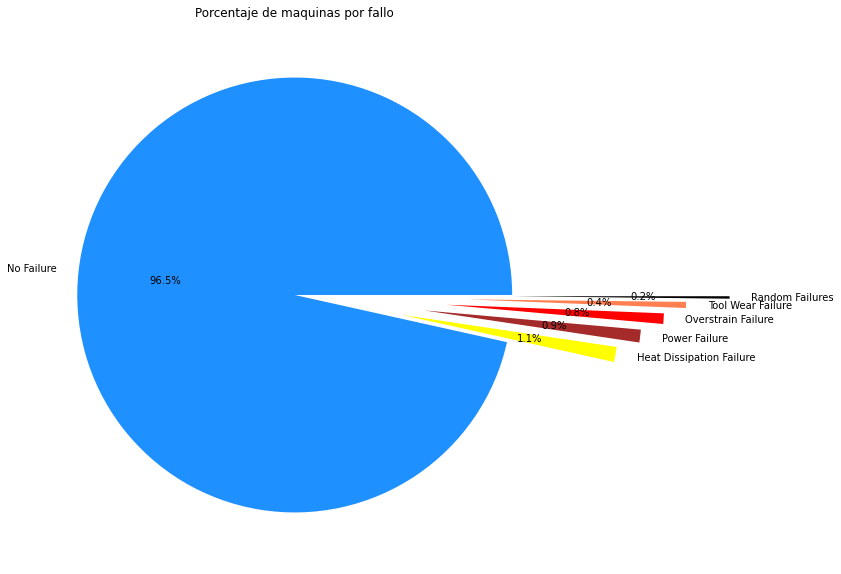

In [39]:
                #PORCENTAJE DE MAQUINAS POR FALLO
plt.figure(figsize = (10,10))                                          
df['Failure_Type'].value_counts().plot.pie(explode = [0, 0.5, 0.6,0.7,0.8,1], colors = ['dodgerblue', 'yellow', 'brown','red','coral','black'], autopct = '%1.1f%%')
plt.xlabel(''),plt.ylabel('')
plt.title('Porcentaje de maquinas por fallo')
plt.show()

In [40]:
#MATRIZ DE CORRELACION
df_modificado=df.drop(columns= ['UDI','Product_ID'])
df_modificado.corr()

,Air_temperature_[K],Process_temperature_[K],Rotational_speed_[rpm],Torque_[Nm],Tool_wear_[min],Target
Air_temperature_[K],1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556
Process_temperature_[K],0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946
Rotational_speed_[rpm],0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188
Torque_[Nm],-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321
Tool_wear_[min],0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448
Target,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000


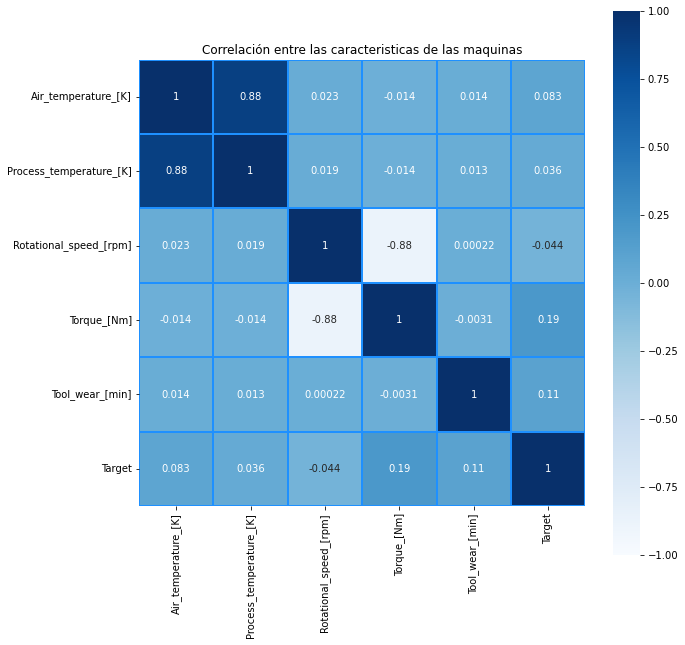

In [45]:
plt.figure(figsize=(10,10))
df_correlacion = df_modificado.corr()
sns.heatmap(df_correlacion, cmap = 'Blues', linewidths = 0.3, linecolor = 'dodgerblue', annot = True,
           vmin = -1, vmax = 1, cbar_kws = {'orientation':'vertical'}, square = True, cbar = True)
plt.title('Correlación entre las caracteristicas de las maquinas')
plt.show()